# Chapter 14 - Parallel Computing Using Dask

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Dask is one of the simplest ways to process your data in a parallel manner. The platform is
for pandas lovers who struggle with large datasets. Dask offers scalability in a similar
manner to Hadoop and Spark and the same flexibility that Airflow and Luigi provide. Dask
can be used to work on pandas DataFrames and Numpy arrays that cannot fit into RAM. It
splits these data structures and processes them in parallel while making minimal code
changes. It utilizes your laptop power and has the ability to run locally. We can also deploy
it on large distributed systems as we deploy Python applications. Dask can execute data in
parallel and processes it in less time. It also scales the computation power of your
workstation without migrating to a larger or distributed environment.

### Let's create an array using Dask:

In [5]:
import dask.array as da

# Create Dask Array using arange() function and generate values from 0 to 17
a = da.arange(18, chunks=4)

# Compute the array
a.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

`da.arange(18, chunks=4):`
This creates a Dask array similar to a numpy array, with values ranging from 0 to 17 (a total of 18 elements).
chunks=4: This parameter divides the array into chunks of size 4. This means that the array is split into smaller blocks that can be processed independently and in parallel. In this case, the array will be split into chunks like this:

    [0, 1, 2, 3]
    [4, 5, 6, 7]
    [8, 9, 10, 11]
    [12, 13, 14, 15]
    [16, 17]
    
These chunks are stored in a lazy manner, meaning that the computation is not performed immediately, but only when needed.

In [7]:
# Check the chunk size
a.chunks

((4, 4, 4, 4, 2),)

In the preceding example, an array with 18 values was partitioned into five parts with a
chunk size of 4, where these initial chunks have 4 values each and the last one has 2 values.

### Let's create an Dataframe using Dask:

In [10]:
# Read csv file using pandas

url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter14/HR_comma_sep.csv"

%time temp = pd.read_csv(url)

CPU times: total: 0 ns
Wall time: 97.8 ms


In the preceding code, we tested the read time of a file using the pandas `read_csv()`
function. Now, let's test the read time for the Dask `read_csv()` function:

In [12]:
# Read csv file using Dask

import dask.dataframe as dd

%time df = dd.read_csv(url)

CPU times: total: 62.5 ms
Wall time: 197 ms


## DataFrame Indexing

Dask DataFrames support two types of index: label-based and positional indexing. The
main problem with Dask Indexing is that it does not maintain the partition's information.
This means it is difficult to perform row indexing; only column indexing is possible.
`DataFrame.iloc` only supports integer-based indexing, while `DataFrame.loc` supports
label-based indexing. `DataFrame.iloc` only selects columns.

In [15]:
# Import Dask and Pandas
import dask.dataframe as dd
import pandas as pd

# Create a larger Pandas DataFrame with an index
df = pd.DataFrame({
    "Department": ['HR', 'IT', 'Finance', 'HR', 'IT', 'Finance', 'IT', 'HR',
                   'HR', 'IT', 'Finance', 'HR', 'IT', 'Finance', 'IT', 'HR'],
    "Employee": ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Hank',
                 'Ivy', 'Jake', 'Kara', 'Liam', 'Mona', 'Nina', 'Omar', 'Pete'],
    "Salary": [50000, 60000, 55000, 58000, 62000, 54000, 61000, 59000,
               52000, 63000, 56000, 57000, 64000, 55000, 60000, 60000]
}, index=[f'emp{i}' for i in range(1, 17)])

print("Pandas DataFrame:")
print(df)

# Create a Dask DataFrame with 4 partitions
ddf = dd.from_pandas(df, npartitions=4)

# Compute the Dask DataFrame and sort by index to match the original order
sorted_ddf = ddf.compute().sort_index()

print("\nDask DataFrame as a Pandas DataFrame:")
print(ddf.compute())  # Display the entire DataFrame

Pandas DataFrame:
      Department Employee  Salary
emp1          HR    Alice   50000
emp2          IT      Bob   60000
emp3     Finance  Charlie   55000
emp4          HR    David   58000
emp5          IT      Eve   62000
emp6     Finance    Frank   54000
emp7          IT    Grace   61000
emp8          HR     Hank   59000
emp9          HR      Ivy   52000
emp10         IT     Jake   63000
emp11    Finance     Kara   56000
emp12         HR     Liam   57000
emp13         IT     Mona   64000
emp14    Finance     Nina   55000
emp15         IT     Omar   60000
emp16         HR     Pete   60000

Dask DataFrame as a Pandas DataFrame:
      Department Employee  Salary
emp1          HR    Alice   50000
emp10         IT     Jake   63000
emp11    Finance     Kara   56000
emp12         HR     Liam   57000
emp13         IT     Mona   64000
emp14    Finance     Nina   55000
emp15         IT     Omar   60000
emp16         HR     Pete   60000
emp2          IT      Bob   60000
emp3     Finance  Charlie

In [16]:
# Access a specific partition, e.g., partition 0
print("\nFirst Partition of the Dask DataFrame:")
print(ddf.partitions[0].compute())  # Compute to view the data in the partition


First Partition of the Dask DataFrame:
      Department Employee  Salary
emp1          HR    Alice   50000
emp10         IT     Jake   63000
emp11    Finance     Kara   56000
emp12         HR     Liam   57000


In [17]:
# Print all partitions
for i in range(ddf.npartitions):
    print(f"\nPartition {i}:")
    print(ddf.partitions[i].compute())  # Compute to view each partition's data


Partition 0:
      Department Employee  Salary
emp1          HR    Alice   50000
emp10         IT     Jake   63000
emp11    Finance     Kara   56000
emp12         HR     Liam   57000

Partition 1:
      Department Employee  Salary
emp13         IT     Mona   64000
emp14    Finance     Nina   55000
emp15         IT     Omar   60000
emp16         HR     Pete   60000

Partition 2:
     Department Employee  Salary
emp2         IT      Bob   60000
emp3    Finance  Charlie   55000
emp4         HR    David   58000
emp5         IT      Eve   62000

Partition 3:
     Department Employee  Salary
emp6    Finance    Frank   54000
emp7         IT    Grace   61000
emp8         HR     Hank   59000
emp9         HR      Ivy   52000


In [18]:
# Check the length of each partition
print("\nLengths of Each Partition:")
print(ddf.map_partitions(len).compute())


Lengths of Each Partition:
0    4
1    4
2    4
3    4
dtype: int64


## Filter data
We can filter the data from a Dask DataFrame similar to how we would do this for a
pandas DataFrame. Let's take a look at the following example:

In [20]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter14/HR_comma_sep.csv'

# Read CSV file
ddf = dd.read_csv(url)

ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Partitioning Strategy: By default, `dd.read_csv()` partitions the file into multiple chunks based on the file size and the number of rows. Typically, Dask aims to keep each partition around 128 MB in size. If the file is large, you will end up with many partitions.


Metadata-Only Dask DataFrame: After calling `dd.read_csv()`, you don’t immediately load the data into memory. Instead, you get a Dask DataFrame object that just holds references to the data and the computation required to load it.

In [22]:
# Print the number of partitions
print(f"Number of partitions: {ddf.npartitions}")

Number of partitions: 1


### Filter

In [24]:
# Filter employee with low salary
ddf2 = ddf[ddf.salary == 'low']

ddf2.compute().head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


### Group

In [26]:
# Group by 'left' and compute the mean, specifying numeric_only=True
result = ddf.groupby('left').mean(numeric_only=True).compute()

result

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Converting a pandas DataFrame into a Dask DataFrame

In [28]:
# Import Dask DataFrame
from dask import dataframe as dd

# Convert pandas dataframe to dask dataframe
ddf = dd.from_pandas(df,chunksize=4)

type(ddf)

dask.dataframe.core.DataFrame

### Converting a Dask DataFrame into a pandas DataFrame

In [30]:
# Convert dask DataFrame to pandas DataFrame
df = ddf.compute()

type(df)

pandas.core.frame.DataFrame

# Preprocessing Data at Scale

    Scaler           Description
    ------           -----------
    MinMaxScaler     Transforms features by scaling each feature to a given range
    RobustScaler     Scales features using statistics that are robust to outliers
    StandardScaler   Standardizes features by removing the mean and scaling them to unit variance

In [33]:
# Read CSV file
ddf = dd.read_csv(url)

ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Example with MinMaxScaler

$$
\text{scaled\_value} = \frac{\text{value} - \text{min}}{\text{max} - \text{min}} \times (\text{feature\_range\_max} - \text{feature\_range\_min}) + \text{feature\_range\_min}
$$


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate the MinMaxScaler Object
scaler = MinMaxScaler(feature_range=(0, 100))  # The smallest value of the column will become 0, and the largest value will become 100 after scaling.

# Fit the data on Scaler
scaler.fit(ddf[['last_evaluation']])           # It only computes the minimum and maximum values required for scaling.

# Transform the data
performance_score=scaler.transform(ddf[['last_evaluation']])  # This method applies the scaling transformation to the data.

# Let's see the scaled performance score
performance_score                              # Show the scaled version of last_evaluation

array([[26.5625],
       [78.125 ],
       [81.25  ],
       ...,
       [26.5625],
       [93.75  ],
       [25.    ]])

# Feature encoding in Dask

In [37]:
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [38]:
from dask_ml.preprocessing import Categorizer
from dask_ml.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

# Create pipeline with Categorizer and OneHotEncoder
pipe = make_pipeline(Categorizer(), OneHotEncoder())

# Fit and transform the Categorizer and OneHotEncoder
pipe.fit(ddf[['salary',]])
result=pipe.transform(ddf[['salary',]])

# See top 5 records
result.head()

,salary_high,salary_low,salary_medium
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


For this code:

`Categorizer()`: Converts categorical columns into numerical categories (labels).

`OneHotEncoder()`: Transforms these categories into a one-hot encoded format.

`make_pipeline()`: Creates a pipeline of preprocessing steps for easy transformation.

In [40]:
from dask_ml.preprocessing import Categorizer
from dask_ml.preprocessing import OrdinalEncoder
from sklearn.pipeline import make_pipeline

# Create pipeline with Categorizer and OrdinalEncoder
pipe = make_pipeline(Categorizer(), OrdinalEncoder())

# Fit and transform the Categorizer and OneHotEncoder
pipe.fit(ddf[['salary',]])
result=pipe.transform(ddf[['salary',]])

# Let's see encoded results
result.head()

,salary
0,1
1,2
2,2
3,1
4,1


# Machine Learning at Scale

### Parallel computing using scikit-learn

#### 1. First, we need to read the dataset.

In [44]:
# Read CSV file
df = pd.read_csv(url)

ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Next, we must select the dependent and independent columns. To do this, select
the columns and divide the data into dependent and independent variables, as
follows:

#### 2. Next, we must select the dependent and independent columns.

In [47]:
# select the feature and target columns
data = df[['satisfaction_level', 'last_evaluation']]
label = df['left']

#### 3. Create a scheduler and generate the model in parallel. 
Import the `dask.distributed` client to create a scheduler and worker on a local machine:

In [49]:
# Import client
from dask.distributed import Client

# Instantiate the Client
client = Client()

`Client()`: Initializes the Dask distributed client. If no parameters are passed, it sets up a default scheduler that will distribute computations across all available cores on your local machine using threads.

#### 4. The next step is to create a parallel backend 
using `sklearn.externals.joblib` and write the normal scikit-learn code:

In [52]:
from joblib import parallel_backend
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

with parallel_backend('dask'):  # Use Dask to parallelize the computation
    
    # Divide the data into two parts: training and testing set
    X_train, X_test, y_train, y_test = train_test_split(data,           # Features for training and testing
                                                        label,          # Target variable
                                                        test_size=0.2,  # Use 20% of the data for testing
                                                        random_state=0) # Ensure reproducibility
    
    # Instantiate RandomForest Model
    model = RandomForestClassifier()  # Create a RandomForest classifier object
    
    # Fit the model
    model.fit(X_train, y_train)       # Train the model using the training data
    
    # Predict the classes
    y_pred = model.predict(X_test)    # Use the model to make predictions on the test set
    
    # Find model accuracy
    print("Accuracy:", accuracy_score(y_test, y_pred))  # Calculate and print the accuracy of the model

Accuracy: 0.9206666666666666


In [53]:
# We need to shut down the parallel computing to continue without environment problems.

client.shutdown()  

## Clustering

In [55]:
url = 'https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter14/HR_comma_sep.csv'

# Read CSV file
ddf = dd.read_csv(url)

ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [56]:
data = ddf[['satisfaction_level','last_evaluation']].to_dask_array(lengths=True)
label = ddf['left'].to_dask_array(lengths=True)

In [57]:
import os

# Set the environment variable to prevent memory leak
os.environ["OMP_NUM_THREADS"] = "1"

In [58]:
# Import Dask based Kmeans
from dask_ml.cluster import KMeans

# Create the Kmeans model
model = KMeans(n_clusters=3)

# Fit the model
model.fit(data)

# Predict the classes
label = model.labels_

# Compute the results
label.compute()

array([1, 0, 1, ..., 1, 1, 1])

In the preceding code, we created the k-means model with three clusters, fitted
the model, and predicted the labels for the cluster.

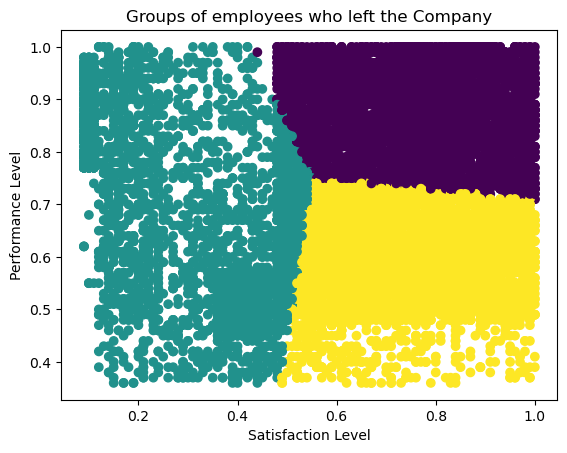

In [60]:
# Prepare x,y and cluster_labels
x=data[:,0].compute()
y=data[:,1].compute()
cluster_labels=label.compute()

# Draw scatter plot
plt.scatter(x,y, c=cluster_labels)
plt.xlabel('Satisfaction Level') 
plt.ylabel('Performance Level')  
plt.title('Groups of employees who left the Company')
plt.show()